# CSC 478 Final Project - Zack Larsen

# Data analysis

# Executive summary


## Project goals:

My goals in this project were to explore the dataset, determine appropriate uses of machine learning techniques to apply to the dataset, and apply those uses optimally by conducting a systematic search for the best parameters to use for each method. Also, for one method, I wanted to construct the application by hand instead of using a library such as scikit-learn or a function.

## Methods used:

After exploring the dataset, I found that I had information on 192 numerical attributes in addition to a categorical attribute (species of the leaf sample). Based on this information, I thought it would be appropriate to use classification methods to attempt to achieve the highest classification accuracy on the dataset. I also wanted to explore an unsupervised technique, and I chose KMeans clustering for that task. 

I performed KMeans clustering in two different approaches to evaluate the difference in results:

1) KMeans clustering without normalization

2) KMeans clustering with normalized and PCA dimensionality-reduced data



I thought about using an estimation model such as multiple linear regression, but the numerical results would not have practical significance for this dataset. The target attribute of interest is the species of the leaf, which is categorical. I therefore decided against running multiple linear regression on the dataset. I did, however, use logistic regression for a classification task on the dataset. Logistic regression allows for the classification of a binary categorical class variable. I decided to perform this task using a binary variable that I constructed, named "maple". This value assumes a value of 1 for all species in the maple family of trees, and a 0 otherwise. My goal was to determine the classification accuracy of the model in separating the maple leaves from other families of tree leaves.


The classification techniques that I used are as follows:

1) LDA classification model built by hand

2) LDA classification model via scikit-learn

3) Decision Trees Classification with grid search

4) Random Forest Classification

5) Gradient-boosted regression trees

6) Support Vector Machines Classification with grid search

7) Logistic regression classification via scikit-learn with stochastic gradient descent

8) Classification via scikit-learn with stochastic gradient descent AND grid search



## Conclusions: for a detailed review of results and conclusions, please see the bottom of this notebook.

In [5]:
cd /Users/zacklarsen/Desktop/Sandisk/DePaul/Past Classes/CSC 478/Project/Leaf classification kaggle data

/Users/zacklarsen/Desktop/Sandisk/DePaul/Past Classes/CSC 478/Project/Leaf classification kaggle data


The dataset consists approximately 1,584 images of leaf specimens (16 samples each of 99 species) which have been converted to binary black leaves against white backgrounds. Three sets of features are also provided per image: a shape contiguous descriptor, an interior texture histogram, and a ﬁne-scale margin histogram. For each feature, a 64-attribute vector is given per leaf sample.

Data fields

id - an anonymous id unique to an image
margin_1, margin_2, margin_3, ..., margin_64 - each of the 64 attribute vectors for the margin feature
shape_1, shape_2, shape_3, ..., shape_64 - each of the 64 attribute vectors for the shape feature
texture_1, texture_2, texture_3, ..., texture_64 - each of the 64 attribute vectors for the texture feature

In [1]:
import numpy as np
from numpy import linalg as la
import pandas as pd

In [6]:
test = pd.read_csv("test.csv")
testDF = pd.DataFrame(test)

In [7]:
testDF.head(2)

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.0,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.0,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922


In [8]:
train = pd.read_csv("train.csv")
trainDF = pd.DataFrame(train)
trainDF.head(2)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.0,0.00293,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.0,0.00000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461


In [9]:
target = trainDF['species']
unique_classes =  set(target) # build a collection of unique elements

In [10]:
unique_list = []
for name in (unique_classes):
    unique_list.append(name)
    

In [11]:
print unique_list

['Populus_Nigra', 'Acer_Saccharinum', 'Quercus_Pontica', 'Alnus_Viridis', 'Olea_Europaea', 'Acer_Rufinerve', 'Acer_Rubrum', 'Cotinus_Coggygria', 'Quercus_Castaneifolia', 'Cornus_Macrophylla', 'Quercus_Pyrenaica', 'Quercus_Rubra', 'Quercus_Semecarpifolia', 'Quercus_Afares', 'Quercus_Pubescens', 'Acer_Pictum', 'Ginkgo_Biloba', 'Quercus_Suber', 'Quercus_x_Turneri', 'Salix_Fragilis', 'Alnus_Cordata', 'Quercus_Agrifolia', 'Sorbus_Aria', 'Acer_Opalus', 'Alnus_Maximowiczii', 'Tilia_Oliveri', 'Quercus_Trojana', 'Quercus_Phellos', 'Tilia_Tomentosa', 'Quercus_Greggii', 'Rhododendron_x_Russellianum', 'Quercus_Rhysophylla', 'Quercus_Crassifolia', 'Alnus_Sieboldiana', 'Castanea_Sativa', 'Callicarpa_Bodinieri', 'Quercus_Shumardii', 'Zelkova_Serrata', 'Eucalyptus_Urnigera', 'Liriodendron_Tulipifera', 'Fagus_Sylvatica', 'Betula_Austrosinensis', 'Crataegus_Monogyna', 'Populus_Adenopoda', 'Acer_Mono', 'Prunus_Avium', 'Acer_Circinatum', 'Magnolia_Heptapeta', 'Quercus_Texana', 'Ilex_Aquifolium', 'Lithocar

In [12]:
print train.head()
train.shape

   id                species   margin1   margin2   margin3   margin4  \
0   1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1   2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   
2   3   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812   
3   5        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859   
4   6     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766   

    margin5   margin6   margin7  margin8    ...      texture55  texture56  \
0  0.011719  0.009766  0.027344      0.0    ...       0.007812   0.000000   
1  0.025391  0.001953  0.019531      0.0    ...       0.000977   0.000000   
2  0.003906  0.005859  0.068359      0.0    ...       0.154300   0.000000   
3  0.021484  0.019531  0.023438      0.0    ...       0.000000   0.000977   
4  0.013672  0.015625  0.005859      0.0    ...       0.096680   0.000000   

   texture57  texture58  texture59  texture60  texture61  texture62  \
0   0.002930   0.002930   0.03515

(990, 194)

In [13]:
print test.head()
test.shape

   id   margin1   margin2   margin3   margin4   margin5   margin6   margin7  \
0   4  0.019531  0.009766  0.078125  0.011719  0.003906  0.015625  0.005859   
1   7  0.007812  0.005859  0.064453  0.009766  0.003906  0.013672  0.007812   
2   9  0.000000  0.000000  0.001953  0.021484  0.041016  0.000000  0.023438   
3  12  0.000000  0.000000  0.009766  0.011719  0.017578  0.000000  0.003906   
4  13  0.001953  0.000000  0.015625  0.009766  0.039062  0.000000  0.009766   

   margin8   margin9    ...      texture55  texture56  texture57  texture58  \
0      0.0  0.005859    ...       0.006836   0.000000   0.015625   0.000977   
1      0.0  0.033203    ...       0.000000   0.000000   0.006836   0.001953   
2      0.0  0.011719    ...       0.128910   0.000000   0.000977   0.000000   
3      0.0  0.003906    ...       0.012695   0.015625   0.002930   0.036133   
4      0.0  0.005859    ...       0.000000   0.042969   0.016602   0.010742   

   texture59  texture60  texture61  texture62  tex

(594, 193)

In [14]:
#We need to separate the target attribute, which is 'Species'
target = trainDF['species']
trainDF = trainDF.drop('species', axis=1)

In [15]:
target.head(5)

0              Acer_Opalus
1    Pterocarya_Stenoptera
2     Quercus_Hartwissiana
3          Tilia_Tomentosa
4       Quercus_Variabilis
Name: species, dtype: object

In [16]:
trainDF.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
id,990.0,799.595960,452.477568,1.0,415.250000,802.500000,1195.500000,1584.000000
margin1,990.0,0.017412,0.019739,0.0,0.001953,0.009766,0.025391,0.087891
margin2,990.0,0.028539,0.038855,0.0,0.001953,0.011719,0.041016,0.205080
margin3,990.0,0.031988,0.025847,0.0,0.013672,0.025391,0.044922,0.156250
margin4,990.0,0.023280,0.028411,0.0,0.005859,0.013672,0.029297,0.169920


In [168]:
print trainDF.shape

(990, 193)


# Preprocessing and preparation

In [17]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler().fit(trainDF)
trainDF_norm = min_max_scaler.transform(trainDF)
testDF_norm = min_max_scaler.transform(testDF)

In [18]:
np.set_printoptions(precision=5,suppress=True)

print trainDF_norm
trainDF_norm.shape

[[ 0.       0.08888  0.11429 ...,  0.01299  0.       0.17931]
 [ 0.00063  0.06666  0.      ...,  0.0026   0.44943  0.15862]
 [ 0.00126  0.06666  0.04762 ...,  0.       0.23596  0.02069]
 ..., 
 [ 0.9981   0.02222  0.01905 ...,  0.07273  0.       0.01379]
 [ 0.99874  0.       0.      ...,  0.       0.02247  0.02069]
 [ 1.       0.26667  0.09524 ...,  0.06234  0.29214  0.15862]]


(990, 193)

In [19]:
np.set_printoptions(precision=5,suppress=True)

print testDF_norm
testDF_norm.shape

[[ 0.0019   0.22222  0.04762 ...,  0.       0.04494  0.37931]
 [ 0.00379  0.08888  0.02857 ...,  0.0026   0.42696  0.31725]
 [ 0.00505  0.       0.      ...,  0.04156  0.       0.     ]
 ..., 
 [ 0.99684  0.2      0.14286 ...,  0.       0.49439  0.04828]
 [ 0.99747  0.15556  0.04762 ...,  0.       0.13483  0.13104]
 [ 0.99937  0.       0.57144 ...,  0.04156  0.       0.12414]]


(594, 193)

In [20]:
trainDF_norm[1]

array([ 0.00063,  0.06666,  0.     ,  0.2    ,  0.09196,  0.22807,
        0.00629,  0.21276,  0.     ,  0.     ,  0.08   ,  0.03125,
        0.51853,  0.0603 ,  0.     ,  0.51515,  0.     ,  0.1613 ,
        0.04274,  0.0625 ,  0.14814,  0.19231,  0.12499,  0.     ,
        0.     ,  0.09523,  0.31818,  0.04762,  0.46341,  0.05263,
        0.40984,  0.48277,  0.21539,  0.05   ,  0.     ,  0.     ,
        0.04348,  0.2    ,  0.2361 ,  0.53125,  0.3125 ,  0.14954,
        0.10639,  0.06666,  0.48485,  0.01099,  0.43478,  0.27778,
        0.21052,  0.32728,  0.     ,  0.0597 ,  0.     ,  0.54545,
        0.36363,  0.20833,  0.17858,  0.28125,  0.06896,  0.06035,
        0.21739,  0.     ,  0.     ,  0.03125,  0.     ,  0.26171,
        0.24312,  0.29103,  0.30455,  0.27298,  0.24606,  0.23994,
        0.2142 ,  0.19241,  0.16368,  0.15922,  0.13577,  0.13202,
        0.13107,  0.13678,  0.15038,  0.15903,  0.16947,  0.18256,
        0.17819,  0.19448,  0.19401,  0.21486,  0.21182,  0.24

# Data visualization

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
viz = pd.read_csv("train.csv")
vizDF = pd.DataFrame(viz)
vizDF = vizDF.iloc[:,1:]  #Getting rid of the id column. It is meaningless here because we want to take the mean of the attributes by class


viz_MV_DF = pd.DataFrame(vizDF.groupby(['species']).mean())

print viz_MV_DF.shape


viz_MV_DF.reset_index(inplace=True)    #This reset_index gets rid of the first empty row and uses numerical indexing instead of species as the index

(99, 192)


In [23]:
viz_MV_DF.head()     #This DF gives us the mean vector for all species

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,Acer_Capillipes,0.001562,0.000391,0.017383,0.017578,0.035937,0.001172,0.029492,0.000391,0.007422,...,0.054981,0.0,0.008692,0.000000,0.016992,0.0,0.0,0.000293,0.024023,0.007813
1,Acer_Circinatum,0.000195,0.000586,0.000977,0.016211,0.032227,0.000000,0.010156,0.000000,0.005664,...,0.111817,0.0,0.005664,0.000781,0.006738,0.0,0.0,0.018457,0.000000,0.015137
2,Acer_Mono,0.021875,0.015039,0.032813,0.026367,0.003125,0.024609,0.026953,0.000391,0.002148,...,0.158303,0.0,0.021094,0.003320,0.005371,0.0,0.0,0.000879,0.000195,0.010352
3,Acer_Opalus,0.014453,0.026953,0.035937,0.007422,0.008594,0.028516,0.043164,0.000977,0.001562,...,0.003906,0.0,0.005859,0.001074,0.028711,0.0,0.0,0.003125,0.002246,0.027344
4,Acer_Palmatum,0.000195,0.000000,0.002930,0.040625,0.089453,0.000391,0.000781,0.001367,0.032227,...,0.011914,0.0,0.104980,0.000000,0.000781,0.0,0.0,0.002344,0.000000,0.016699


In [24]:
# Add an index column
viz_MV_DF['index'] = np.linspace(0,98,99)

In [25]:
viz_MV_DF.head(2)

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64,index
0,Acer_Capillipes,0.001562,0.000391,0.017383,0.017578,0.035937,0.001172,0.029492,0.000391,0.007422,...,0.0,0.008692,0.000000,0.016992,0.0,0.0,0.000293,0.024023,0.007813,0.0
1,Acer_Circinatum,0.000195,0.000586,0.000977,0.016211,0.032227,0.000000,0.010156,0.000000,0.005664,...,0.0,0.005664,0.000781,0.006738,0.0,0.0,0.018457,0.000000,0.015137,1.0


In [26]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
%matplotlib inline

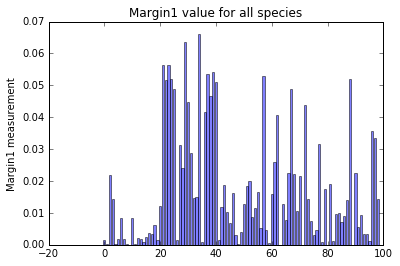

In [27]:
X = viz_MV_DF['index']
y = viz_MV_DF['margin1']



plt.bar(X, y, align='center', alpha=0.5)

plt.ylabel('Margin1 measurement')
plt.title('Margin1 value for all species')
 
plt.show()

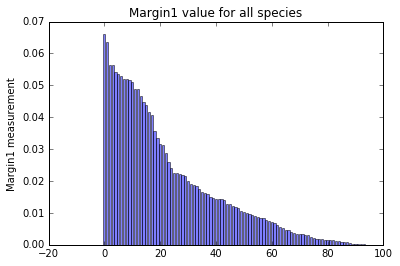

In [28]:
#Sorting the x axis of the plot above by the value for y 
y = y.sort_values(ascending=0)

plt.bar(X, y, align='center', alpha=0.5)

plt.ylabel('Margin1 measurement')
plt.title('Margin1 value for all species')
 
plt.show()

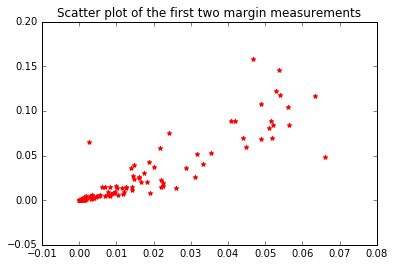

In [135]:
#Make a scatterplot to see if the first two margin measurements are correlated
plt.scatter(viz_MV_DF['margin1'],viz_MV_DF['margin2'], color="red", marker="*")
plt.title('Scatter plot of the first two margin measurements')


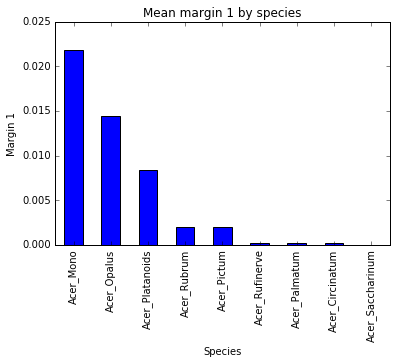

In [29]:
#Showing the mean margin 1 value for the top 10 species


marginDF = train['margin1'].groupby(train['species']).mean()
newDF = marginDF[1:10]
newDF.sort_values(ascending=0)

import matplotlib.pyplot as plt
%matplotlib inline


#my_plot = newDF.plot(kind='bar')

my_plot = newDF.sort_values(ascending=False).plot(kind='bar',title="Mean margin 1 by species")
my_plot.set_xlabel("Species")
my_plot.set_ylabel("Margin 1")

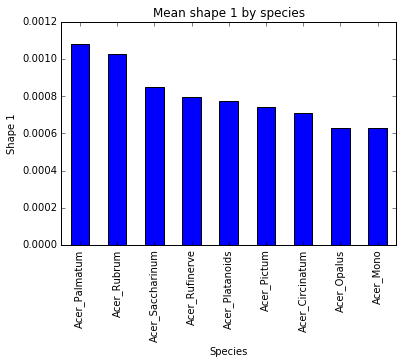

In [104]:
#Showing the mean shape 1 value for the top 10 species



shapeDF = train['shape1'].groupby(train['species']).mean()
newDF = shapeDF[1:10]
newDF.sort_values(ascending=0)

import matplotlib.pyplot as plt
%matplotlib inline


#my_plot = newDF.plot(kind='bar')

my_plot = newDF.sort_values(ascending=False).plot(kind='bar',title="Mean shape 1 by species")
my_plot.set_xlabel("Species")
my_plot.set_ylabel("Shape 1")

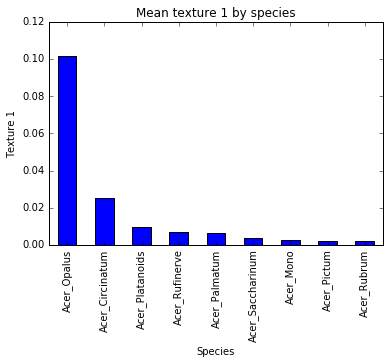

In [105]:
#Showing the mean texture 1 value for the top 10 species


textureDF = train['texture1'].groupby(train['species']).mean()
newDF = textureDF[1:10]
newDF.sort_values(ascending=0)

import matplotlib.pyplot as plt
%matplotlib inline


#my_plot = newDF.plot(kind='bar')

my_plot = newDF.sort_values(ascending=False).plot(kind='bar',title="Mean texture 1 by species")
my_plot.set_xlabel("Species")
my_plot.set_ylabel("Texture 1")

### It looks like from the above plots that species with the surname Acer have the highest values for the first measure of each attribute family (texture, shape, margin). This is the genus that contains all maple species. These visualizations might help us to understand that we can easily classify the maple species using the first measure of each attribute family.

In [106]:
# This is a dataframe of the shape columns

shapes = trainDF.iloc[:,66:130]
shapes.head(2)

,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,...,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1
0,0.000609,0.000576,0.000553,0.000516,0.000496,0.000474,0.000453,0.000454,0.000429,0.000418,...,0.000434,0.000452,0.000471,0.000485,0.000512,0.000536,0.000553,0.000610,0.000661,0.049805
1,0.000695,0.000720,0.000709,0.000688,0.000660,0.000624,0.000585,0.000556,0.000531,0.000506,...,0.000546,0.000574,0.000608,0.000641,0.000674,0.000703,0.000707,0.000688,0.000747,0.000000


In [107]:
# This is a dataframe of the texture columns

textures = trainDF.iloc[:,130:199]
textures.head(2)

,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.017578,0.003906,0.024414,0.001953,0.010742,0.035156,0.007812,0.039062,0.062500,0.0,...,0.007812,0.0,0.00293,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,0.000000,0.007812,0.079102,0.000000,0.039062,0.000977,0.000000,0.027344,0.003906,0.0,...,0.000977,0.0,0.00000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461


# Application of two or more machine learning techniques on the data (e.g., classification, estimation, clustering, association rule discovery, etc.). 

# Clustering

In [305]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [306]:
data = pd.read_csv("train.csv")
X_train = data.iloc[:,2:]
target = data.iloc[:,1]

In [307]:
X_train.head(2)

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.0,0.00293,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.000977,0.0,0.00000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461


In [308]:
target.head(3)

0              Acer_Opalus
1    Pterocarya_Stenoptera
2     Quercus_Hartwissiana
Name: species, dtype: object

In [309]:
kmeans = KMeans(n_clusters=7, max_iter=500, verbose=1) # initialization

In [310]:
kmeans.fit(X_train)

Initialization complete
Iteration  0, inertia 88.716
Iteration  1, inertia 61.819
Iteration  2, inertia 59.600
Iteration  3, inertia 59.061
Iteration  4, inertia 58.819
Iteration  5, inertia 58.649
Iteration  6, inertia 58.520
Iteration  7, inertia 58.357
Iteration  8, inertia 58.103
Iteration  9, inertia 58.003
Iteration 10, inertia 57.945
Iteration 11, inertia 57.915
Iteration 12, inertia 57.900
Iteration 13, inertia 57.883
Iteration 14, inertia 57.859
Iteration 15, inertia 57.845
Iteration 16, inertia 57.838
Iteration 17, inertia 57.834
Iteration 18, inertia 57.833
Converged at iteration 18
Initialization complete
Iteration  0, inertia 88.546
Iteration  1, inertia 61.117
Iteration  2, inertia 58.521
Iteration  3, inertia 57.277
Iteration  4, inertia 56.728
Iteration  5, inertia 56.405
Iteration  6, inertia 56.311
Iteration  7, inertia 56.264
Iteration  8, inertia 56.196
Iteration  9, inertia 56.133
Iteration 10, inertia 56.114
Iteration 11, inertia 56.108
Iteration 12, inertia 56.10

KMeans(copy_x=True, init='k-means++', max_iter=500, n_clusters=7, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=1)

In [311]:
clusters = kmeans.predict(X_train)

In [312]:
print clusters

[4 4 6 4 6 3 6 6 4 1 4 1 6 4 1 4 4 3 4 1 4 6 1 1 2 4 0 2 4 3 2 1 4 0 6 4 4
 2 6 1 6 6 6 1 2 6 1 4 6 6 6 4 6 4 4 4 0 2 0 6 1 0 3 0 4 6 6 6 3 6 2 3 3 4
 6 2 4 4 6 1 6 1 6 6 3 2 1 6 3 6 6 6 4 6 6 5 6 6 2 6 6 6 1 4 4 6 6 6 2 4 2
 6 4 3 6 6 4 4 2 1 6 2 6 3 2 4 6 4 3 2 6 3 0 1 4 2 2 4 4 4 6 3 6 2 6 3 1 3
 4 4 6 2 2 1 6 4 2 2 6 6 2 4 5 6 3 2 4 2 5 6 2 4 6 2 2 4 2 3 1 1 4 4 4 6 6
 3 2 5 6 2 6 4 6 6 1 3 4 3 5 2 1 0 6 0 2 6 4 6 6 6 1 3 2 6 2 6 6 4 5 1 1 1
 1 1 6 6 1 4 6 0 6 4 6 1 4 2 1 3 4 2 6 4 0 2 2 3 4 5 6 6 4 1 6 2 1 1 2 2 1
 4 6 2 1 6 6 4 6 4 6 6 4 2 6 4 2 5 6 0 4 6 0 6 2 2 1 2 6 6 4 1 4 1 4 6 4 1
 3 6 4 6 1 4 6 2 6 3 2 0 4 6 4 6 6 2 0 4 6 2 4 4 4 2 0 2 6 6 4 2 0 4 0 0 4
 4 4 4 2 1 1 4 1 4 2 6 6 6 3 6 6 0 2 3 6 6 4 2 2 6 4 6 4 6 2 1 3 4 4 6 2 4
 6 2 5 2 4 2 4 0 2 4 6 4 0 0 0 4 4 2 1 1 6 4 6 1 4 4 6 6 6 5 6 4 1 2 1 4 4
 4 4 1 4 5 1 2 2 6 6 4 2 0 2 6 6 4 4 2 0 0 1 6 4 5 6 6 6 1 4 1 4 2 6 2 2 6
 0 4 2 4 1 2 1 0 1 4 2 1 3 3 2 2 6 4 1 2 1 4 2 4 6 4 4 6 1 4 2 2 6 6 1 0 6
 0 4 4 4 2 1 1 2 2 2 1 2 

In [313]:
centroids = kmeans.cluster_centers_

In [314]:
np.set_printoptions(precision=5,suppress=True)
print centroids

[[ 0.01442  0.01803  0.02942 ...,  0.02519  0.01138  0.00224]
 [ 0.013    0.01893  0.02375 ...,  0.08411  0.00917  0.00516]
 [ 0.04464  0.08928  0.01669 ...,  0.0084   0.00724  0.02339]
 ..., 
 [ 0.01268  0.01708  0.03805 ...,  0.00852  0.01097  0.03167]
 [ 0.02654  0.05238  0.02974 ...,  0.05176  0.00182 -0.     ]
 [ 0.00683  0.00734  0.04181 ...,  0.00642  0.00955  0.02082]]


In [315]:
print "\t\t  Species Name\tCluster 0\tCluster 1"
for i in range(len(target)):
    print "%30s\t%.8f\t%.8f" %(target[i],centroids[0][i],centroids[1][i])

		  Species Name	Cluster 0	Cluster 1
                   Acer_Opalus	0.01442303	0.01299685
         Pterocarya_Stenoptera	0.01802882	0.01892803
          Quercus_Hartwissiana	0.02942200	0.02375344
               Tilia_Tomentosa	0.02356269	0.01901418
            Quercus_Variabilis	0.01727760	0.02866499
          Magnolia_Salicifolia	0.03470545	0.02516087
           Quercus_Canariensis	0.01727762	0.02113964
                 Quercus_Rubra	0.00180282	0.00089035
               Quercus_Brantii	0.00555874	0.00521292
                Salix_Fragilis	0.01735272	0.01845413
               Zelkova_Serrata	0.02238581	0.01685999
         Betula_Austrosinensis	0.01752797	0.01585471
               Quercus_Pontica	0.02631705	0.02534749
                Quercus_Afares	0.00578418	0.00578746
             Quercus_Coccifera	0.02296167	0.02063703
               Fagus_Sylvatica	0.00022536	0.00025850
                   Phildelphus	0.01459831	0.01437555
                 Acer_Palmatum	0.01647629	0.01414572
         

IndexError: index 192 is out of bounds for axis 0 with size 192

In [316]:
from sklearn.metrics import completeness_score, homogeneity_score

### The completeness score approaches 1 when most of the data points that are members of a given class are elements of the same cluster.

In [317]:
print completeness_score(target,clusters)

0.761555573476


### The homogeneity score approaches 1 when all the clusters contain almost only data points that are members of a single class.

In [318]:
print homogeneity_score(target,clusters)

0.285422666406


# Performing PCA on data to do reduced-dimensionality clustering

In [331]:
from sklearn import preprocessing

In [333]:
# Load in the data
data = pd.read_csv("train.csv")
X_train = data.iloc[:,2:]
target = data.iloc[:,1]


### Preprocess the data by scaling

In [346]:
min_max_scaler = preprocessing.MinMaxScaler()
image = min_max_scaler.fit_transform(X_train)

In [347]:
from sklearn.decomposition import PCA as PCA

In [348]:
pca = PCA(n_components=40)
X_train_trans = pca.fit(X_train).transform(X_train)

In [349]:
np.set_printoptions(precision=4,suppress=True)
X_train_trans

array([[-0.0344, -0.044 , -0.0782, ..., -0.0077,  0.008 ,  0.014 ],
       [-0.0983, -0.0767, -0.0165, ..., -0.0023,  0.0068,  0.0044],
       [ 0.0871, -0.084 ,  0.072 , ...,  0.0305, -0.0137, -0.0146],
       ..., 
       [-0.1177, -0.0553,  0.0512, ...,  0.0157,  0.0054, -0.0008],
       [ 0.0509, -0.0504,  0.0687, ...,  0.0293,  0.0242,  0.0675],
       [-0.0539, -0.0364, -0.0733, ..., -0.0072, -0.0165, -0.0071]])

In [350]:
np.set_printoptions(precision=8,suppress=True)

print(pca.explained_variance_ratio_)

[ 0.14980004  0.101889    0.08671815  0.06781204  0.05548522  0.04619595
  0.04204927  0.03934713  0.03282465  0.02917133  0.02656111  0.02310864
  0.01881984  0.01794017  0.01612851  0.01545189  0.01433372  0.01412917
  0.01286679  0.01108844  0.00942185  0.00919093  0.00848232  0.00773148
  0.00727613  0.00703049  0.00656127  0.00616554  0.00578171  0.005361
  0.00516237  0.00461435  0.0041706   0.00407401  0.00360426  0.00353355
  0.00335529  0.00316332  0.0031      0.00291555]


In [355]:
num_PC = 32
cumulative_variance = 0
for i in range(num_PC):
    cumulative_variance += pca.explained_variance_ratio_[i]
    
print "Cumulative variance with",num_PC,"components is: ",cumulative_variance

Cumulative variance with 32 components is:  0.904500523121


In [358]:
pca = PCA(n_components=32)
X_train_trans = pca.fit(X_train).transform(X_train)

In [359]:
kmeans = KMeans(n_clusters=7, max_iter=500, verbose=1) # initialization

In [360]:
kmeans.fit(X_train_trans)

Initialization complete
Iteration  0, inertia 66.129
Iteration  1, inertia 51.032
Iteration  2, inertia 49.590
Iteration  3, inertia 49.151
Iteration  4, inertia 48.794
Iteration  5, inertia 48.424
Iteration  6, inertia 48.202
Iteration  7, inertia 48.114
Iteration  8, inertia 47.992
Iteration  9, inertia 47.906
Iteration 10, inertia 47.847
Iteration 11, inertia 47.778
Iteration 12, inertia 47.758
Iteration 13, inertia 47.750
Iteration 14, inertia 47.738
Iteration 15, inertia 47.732
Iteration 16, inertia 47.727
Iteration 17, inertia 47.722
Iteration 18, inertia 47.717
Iteration 19, inertia 47.716
Converged at iteration 19
Initialization complete
Iteration  0, inertia 64.148
Iteration  1, inertia 49.050
Iteration  2, inertia 48.275
Iteration  3, inertia 47.806
Iteration  4, inertia 47.366
Iteration  5, inertia 47.015
Iteration  6, inertia 46.746
Iteration  7, inertia 46.519
Iteration  8, inertia 46.390
Iteration  9, inertia 46.331
Iteration 10, inertia 46.305
Iteration 11, inertia 46.28

KMeans(copy_x=True, init='k-means++', max_iter=500, n_clusters=7, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=1)

In [361]:
clusters = kmeans.predict(X_train_trans)

In [362]:
from sklearn.metrics import completeness_score, homogeneity_score

In [363]:
print completeness_score(target,clusters)

0.757622653141


In [364]:
print homogeneity_score(target,clusters)

0.282731686652


### It appears that the completeness and homogeneity scores have not dramatically changed even though we reduced the data from 192 dimensions to 32 dimensions

## In the project description for the data analysis project, the instructions say "At least one of the machine learning techniques used must involve building and evaluating a predictive model."

## I was uncertain whether this meant to build a model from scratch (e.g., without using an implementation in scikit learn) or if it meant to simply build a model by creating a train/test split, fitting the training data to the classifier model using something like scikit learn, and then computing the accuracy of the classifier model using the test data.

## I have successfully used several different implementations in scikit learn of different classifers we saw in class as well as ones we did not see, but I was ultimately unsuccessful in creating a model from scratch without the use of scikit learn. 

## I tried to perform linear discriminant analysis by computing the overall mean vector on the data, the mean vector for each species class, the within-class scatter matrix, and the between-class scatter matrix. I then planned on selecting the top k eigenvectors based on the largest eigenvalues of the scatter matrices to transform the data onto the new feature subspace.

## Unfortunately, I ran into a Type Error when trying to compute the scatter matrices that prevented me from finishing this task. I would appreciate any feedback on what I did wrong in the computations to give me this error.

## I have shown my work below, but it is not complete, because I wasn't able to move any further after I encountered the Type Error.

# Using LDA built from scratch

# Step 1: compute mean vectors

In [16]:
LDA_train = pd.read_csv("train.csv")
LDA_trainDF = pd.DataFrame(LDA_train)
LDA_trainDF = LDA_trainDF.iloc[:,1:]  #Getting rid of the id column. It is meaningless here because we want to take the mean of the attributes by class

LDA_trainDF.head()

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [17]:
# Create a groupby variable that computes the mean of all attributes, grouped by species class
# These are the mean vectors for step one of LDA

MV_DF = pd.DataFrame(LDA_trainDF.groupby(['species']).mean())

print MV_DF.shape


MV_DF.reset_index(inplace=True)    #This reset_index gets rid of the first empty row and uses numerical indexing instead of species as the index

(99, 192)


In [18]:
MV_DF.head(2)

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,Acer_Capillipes,0.001562,0.000391,0.017383,0.017578,0.035937,0.001172,0.029492,0.000391,0.007422,...,0.054981,0.0,0.008692,0.000000,0.016992,0.0,0.0,0.000293,0.024023,0.007813
1,Acer_Circinatum,0.000195,0.000586,0.000977,0.016211,0.032227,0.000000,0.010156,0.000000,0.005664,...,0.111817,0.0,0.005664,0.000781,0.006738,0.0,0.0,0.018457,0.000000,0.015137


In [19]:
MV_DF[MV_DF['species']=='Acer_Opalus']

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
3,Acer_Opalus,0.014453,0.026953,0.035937,0.007422,0.008594,0.028516,0.043164,0.000977,0.001562,...,0.003906,0.0,0.005859,0.001074,0.028711,0.0,0.0,0.003125,0.002246,0.027344


In [244]:
# Making the subset of the training data for a given species

#Acer_Opalus = pd.DataFrame(LDA_trainDF[LDA_trainDF['species']=='Acer_Opalus'])
#Acer_Opalus = Acer_Opalus.iloc[:,1:194]

In [241]:
# Making the mean vector for a given species

#Acer_Opalus_MV = MV_DF[MV_DF['species']=='Acer_Opalus'].values
#Acer_Opalus_MV = Acer_Opalus_MV[:,1:]

# Step 2: Compute the scatter matrices

### Within-class scatter matrix

# Having problems here because we are trying to add the dot product to the scatter matrix and we receive a type error because the output is the same as the input

In [20]:
print len(unique_list)
unique_list[1:6] #Print first 5 species names

99


['Acer_Saccharinum',
 'Quercus_Pontica',
 'Alnus_Viridis',
 'Olea_Europaea',
 'Acer_Rufinerve']

In [21]:
LDA_trainDF.head(3)

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.0,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.0,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.0,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930


In [22]:
MV_DF.head(3)

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,Acer_Capillipes,0.001562,0.000391,0.017383,0.017578,0.035937,0.001172,0.029492,0.000391,0.007422,...,0.054981,0.0,0.008692,0.000000,0.016992,0.0,0.0,0.000293,0.024023,0.007813
1,Acer_Circinatum,0.000195,0.000586,0.000977,0.016211,0.032227,0.000000,0.010156,0.000000,0.005664,...,0.111817,0.0,0.005664,0.000781,0.006738,0.0,0.0,0.018457,0.000000,0.015137
2,Acer_Mono,0.021875,0.015039,0.032813,0.026367,0.003125,0.024609,0.026953,0.000391,0.002148,...,0.158303,0.0,0.021094,0.003320,0.005371,0.0,0.0,0.000879,0.000195,0.010352


# Pseudocode for the process below


### initialize a square zero matrix with dimensions equal to the number of attributes in the data (in this case, 192)

### for each species:
###    initialize a zero matrix for the scatter matrix for that class
    
    ###    for each row of data corresponding to that species:
    ###        compute the dot product of the difference between that row and the mean vector for that species
    ###       add that dot product to the class scatter matrix
    
###   add the class scatter matrix to the overall within class scatter matrix   

## Below is a function that takes as input the training dataframe, the list of unique class values, and the mean vector data frame. It doesn't return anything as output;  rather, it adds the computations from the nested loop to the within-class scatter matrix S_W

In [23]:
def make_S_W(LDA_trainDF,unique_list,MV_DF):

    S_W = np.mat(np.zeros((192,192)))   #Initialize the zero matrix S_W


    for name in unique_list:    #For each species class
    
        species_data = pd.DataFrame(LDA_trainDF[LDA_trainDF['species']==name])  #select rows of the train data for that species
        species_data = species_data.iloc[:,1:194]
    
        species_MV =  MV_DF[MV_DF['species']==name].values  #Define the mean vector for this species
        species_MV = species_MV[0,1:] #Remove the species column so we have a numerical vector of length 192
    
    
    
        class_scatter_matrix = np.mat(np.zeros((192,192)))
    
        for i in range(len(species_data)):      #For each row of training data corresponding to the species
        
            row = species_data.iloc[i,:].values    #This is one of the rows of data for this species
            data_col =  row.reshape(192,1)         #Make a column vector out of the data row
            MV_col = species_MV.reshape(192,1)     #Make a column vector out of the mean vector for this species
   
    
            row_scat_mat = (data_col-MV_col).dot((data_col-MV_col).T)
        
            class_scatter_matrix += np.mat(row_scat_mat)  #This is where we are getting the type error
      
        
        S_W += class_scatter_matrix
        
    return S_W

In [24]:
make_S_W(LDA_trainDF,unique_list,MV_DF)

TypeError: ufunc 'add' output (typecode 'O') could not be coerced to provided output parameter (typecode 'd') according to the casting rule ''same_kind''

In [25]:
beginning_mat = np.zeros((192,192))

In [26]:
mat1 = 2*np.ones((192,1))

In [27]:
mat1

array([[ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
      

In [28]:
mat2 = np.ones((192,1))

In [29]:
mat2

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
      

In [30]:
row_scat_mat = (mat1-mat2).dot((mat1-mat2).T)

In [31]:
print row_scat_mat.shape
row_scat_mat

(192, 192)


array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [32]:
beginning_mat += row_scat_mat

In [33]:
beginning_mat

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [34]:
S_W = np.zeros((192,192))

for name in unique_list:
    species_data = pd.DataFrame(LDA_trainDF[LDA_trainDF['species']==name])  #select rows of the train data for that species
    species_data = species_data.iloc[:,1:194]
    
    species_MV =  MV_DF[MV_DF['species']==name].values  #Define the mean vector for this species
    species_MV = species_MV[0,1:]
    
    
    
    class_scatter_matrix = np.ones((192,192))
    S_W += class_scatter_matrix

In [35]:
S_W

array([[ 99.,  99.,  99., ...,  99.,  99.,  99.],
       [ 99.,  99.,  99., ...,  99.,  99.,  99.],
       [ 99.,  99.,  99., ...,  99.,  99.,  99.],
       ..., 
       [ 99.,  99.,  99., ...,  99.,  99.,  99.],
       [ 99.,  99.,  99., ...,  99.,  99.,  99.],
       [ 99.,  99.,  99., ...,  99.,  99.,  99.]])

In [38]:
start0 = 0

for i in range(99):     #For all 99 species
    
    start = 0
    
    
    for i in range(10):    #For all 10 rows corresponding to that species
        start += i
        
        
    start0 += start

In [37]:
start0

4455

### Between-class scatter matrix

In [41]:
# The overall mean is the mean of all attributes for the entire training dataset

overall_mean = np.mean(train.iloc[:,2:],axis=0).values

In [42]:
np.set_printoptions(precision=6,suppress=True)


print len(overall_mean)
print overall_mean

192
[ 0.017412  0.028539  0.031988  0.02328   0.014264  0.038579  0.019202
  0.001083  0.007167  0.018639  0.024209  0.011975  0.041252  0.008053
  0.015609  0.00011   0.015128  0.020107  0.012344  0.013135  0.019131
  0.006195  0.000998  0.007647  0.008854  0.018718  0.005628  0.015534
  0.028261  0.016501  0.010843  0.009691  0.019502  0.001083  0.013167
  0.018042  0.016268  0.031061  0.014846  0.008164  0.010884  0.017495
  0.018858  0.012679  0.024688  0.010058  0.02532   0.027002  0.00856
  0.013982  0.025657  0.002764  0.024002  0.010002  0.018192  0.00596
  0.012559  0.02019   0.03095   0.011851  0.001389  0.004983  0.025389
  0.004374  0.000739  0.000718  0.000694  0.000671  0.00065   0.000632
  0.000617  0.000604  0.00059   0.000578  0.000569  0.000562  0.000556
  0.000551  0.000546  0.000543  0.000542  0.000542  0.000542  0.000546
  0.000554  0.000563  0.000575  0.000586  0.000599  0.000613  0.000628
  0.000644  0.000663  0.000687  0.000711  0.000734  0.000739  0.000718
  0.

In [43]:
MV_DF.head(3)

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,Acer_Capillipes,0.001562,0.000391,0.017383,0.017578,0.035937,0.001172,0.029492,0.000391,0.007422,...,0.054981,0.0,0.008692,0.000000,0.016992,0.0,0.0,0.000293,0.024023,0.007813
1,Acer_Circinatum,0.000195,0.000586,0.000977,0.016211,0.032227,0.000000,0.010156,0.000000,0.005664,...,0.111817,0.0,0.005664,0.000781,0.006738,0.0,0.0,0.018457,0.000000,0.015137
2,Acer_Mono,0.021875,0.015039,0.032813,0.026367,0.003125,0.024609,0.026953,0.000391,0.002148,...,0.158303,0.0,0.021094,0.003320,0.005371,0.0,0.0,0.000879,0.000195,0.010352


In [407]:
#MV_DF.iloc[3,2:194].values    #This gives us the values for the sample mean for class 3

In [44]:
#Calculating the sample mean for class i

sample_mean_vectors = []

for i in range(len(MV_DF)):
    mi = MV_DF.iloc[i,2:194].values
    
    #print mi
    sample_mean_vectors.append(mi)

In [45]:
sample_mean_vectors[98][0]

0.014453100000000002

In [47]:
#Create the between-class scatter matrix Sb

ZM = np.zeros((192,192))   #Initialize the zero matrix

for species in(unique_classes):   #For each class:
    #print species
    n =  len(LDA_trainDF[LDA_trainDF['species']==species])      #n = #rows in class

    #make a column vector for the mean vector of that class
    species_MV = MV_DF[MV_DF['species']==species].values
    species_MV = species_MV[:,1:]
    species_MVT = species_MV.T

    #make a column vector for the overall mean
    overall_MVT = overall_mean.T
    
    
    #compute the difference between the mean vector and the overall mean
    difference = species_MVT - overall_MVT
    
    
    #The between-class scatter matrix for class i is n times the dot product of the difference and the difference transpose
    SBi = n * difference.dot((difference).T)


    #add the between-class scatter matrix for class i to the zero matrix ZM
    SBsum = ZM + SBi
        
    
    print SBsum
    


[[0.24017860957163706 0.34712806222520076 0.735075496026758 ...,
  0.13113549825914553 0.11959890221290014 0.3093799334402877]
 [0.34712806222520076 0.644586660241965 1.7235851674771236 ...,
  0.043846369709509316 0.011759625919264079 0.5395977595274516]
 [0.735075496026758 1.7235851674771236 5.30929580752508 ...,
  -0.27278539024253334 -0.3794155457447787 1.3746877261418098]
 ..., 
 [0.13113549825914553 0.043846369709509316 -0.27278539024253334 ...,
  0.22013341198985387 0.2295492564876086 0.07465532837419599]
 [0.11959890221290014 0.011759625919264079 -0.3794155457447787 ...,
  0.2295492564876086 0.24118183746536326 0.04982182061595075]
 [0.3093799334402877 0.5395977595274516 1.3746877261418098 ...,
  0.07465532837419599 0.04982182061595075 0.4583416901217383]]
[[0.39663820587133497 0.39663820587133497 -0.0174974504903604 ...,
  0.39663820587133497 0.25925832256320575 0.2931007238429488]
 [0.39663820587133497 0.39663820587133497 -0.0174974504903604 ...,
  0.39663820587133497 0.259258

# Here, we are troubleshooting the += operation for the scatter matrix

In [48]:
#Create the between-class scatter matrix Sb for Acer_Opalus

ZM = np.zeros((192,192))   #Initialize the zero matrix


n =  len(LDA_trainDF[LDA_trainDF['species']=='Acer_Opalus'])      #n = #rows in class

    #make a column vector for the mean vector of that class
species_MV = MV_DF[MV_DF['species']=='Acer_Opalus'].values
species_MV = species_MV[:,1:]
species_MVT = species_MV.T

    #make a column vector for the overall mean
overall_MVT = overall_mean.T
    
    
    #compute the difference between the mean vector and the overall mean
difference = species_MVT - overall_MVT
    
    
    #The between-class scatter matrix for class i is n times the dot product of the difference and the difference transpose
SBi = n * difference.dot((difference).T)


print SBi.shape
print ZM.shape



    #add the between-class scatter matrix for class i to the zero matrix ZM
SBsum = ZM + SBi
   
print('between-class Scatter Matrix:\n', SBsum)
print SBsum.shape

(192, 192)
(192, 192)
('between-class Scatter Matrix:\n', array([[0.20836368861392382, 0.30038518546964826, 0.3665227607319378, ...,
        0.12497139254652297, 0.1185020684953553, 0.3032606041933464],
       [0.30038518546964826, 0.6924210824981727, 0.9741846326596624, ...,
        -0.05488803558335276, -0.08244906582332037, 0.7046711262074707],
       [0.3665227607319378, 0.9741846326596624, 1.4109226141299505, ...,
        -0.18415637907946308, -0.2268764140426308, 0.9931723951273609],
       ..., 
       [0.12497139254652297, -0.05488803558335276, -0.18415637907946308,
        ..., 0.2879647277303222, 0.3006092614967545, -0.06050814811085449],
       [0.1185020684953553, -0.08244906582332037, -0.2268764140426308, ...,
        0.3006092614967545, 0.31473659098798684, -0.0887282361684221],
       [0.3032606041933464, 0.7046711262074707, 0.9931723951273609, ...,
        -0.06050814811085449, -0.0887282361684221, 0.717214101167969]], dtype=object))
(192, 192)


In [49]:
ZM

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [50]:
SBi

array([[0.20836368861392382, 0.30038518546964826, 0.3665227607319378, ...,
        0.12497139254652297, 0.1185020684953553, 0.3032606041933464],
       [0.30038518546964826, 0.6924210824981727, 0.9741846326596624, ...,
        -0.05488803558335276, -0.08244906582332037, 0.7046711262074707],
       [0.3665227607319378, 0.9741846326596624, 1.4109226141299505, ...,
        -0.18415637907946308, -0.2268764140426308, 0.9931723951273609],
       ..., 
       [0.12497139254652297, -0.05488803558335276, -0.18415637907946308,
        ..., 0.2879647277303222, 0.3006092614967545, -0.06050814811085449],
       [0.1185020684953553, -0.08244906582332037, -0.2268764140426308, ...,
        0.3006092614967545, 0.31473659098798684, -0.0887282361684221],
       [0.3032606041933464, 0.7046711262074707, 0.9931723951273609, ...,
        -0.06050814811085449, -0.0887282361684221, 0.717214101167969]], dtype=object)

In [51]:
ZM + SBi

array([[0.20836368861392382, 0.30038518546964826, 0.3665227607319378, ...,
        0.12497139254652297, 0.1185020684953553, 0.3032606041933464],
       [0.30038518546964826, 0.6924210824981727, 0.9741846326596624, ...,
        -0.05488803558335276, -0.08244906582332037, 0.7046711262074707],
       [0.3665227607319378, 0.9741846326596624, 1.4109226141299505, ...,
        -0.18415637907946308, -0.2268764140426308, 0.9931723951273609],
       ..., 
       [0.12497139254652297, -0.05488803558335276, -0.18415637907946308,
        ..., 0.2879647277303222, 0.3006092614967545, -0.06050814811085449],
       [0.1185020684953553, -0.08244906582332037, -0.2268764140426308, ...,
        0.3006092614967545, 0.31473659098798684, -0.0887282361684221],
       [0.3032606041933464, 0.7046711262074707, 0.9931723951273609, ...,
        -0.06050814811085449, -0.0887282361684221, 0.717214101167969]], dtype=object)

In [52]:
ZM += SBi

TypeError: ufunc 'add' output (typecode 'O') could not be coerced to provided output parameter (typecode 'd') according to the casting rule ''same_kind''

# Above, we keep getting the "same_kind" Type Error when we try to add the class scatter matrix to the overall scatter matrix

# Step 3: Solve the generalized eigenvalue problem to obtain the linear discriminants

In [ ]:
S_W =    #Within-class scatter matrix
S_B =    #Between-class scatter matrix

In [54]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))  
#Compute the eigenvectors and eigenvlues on the dot product of the scatter matrices

LinAlgError: Singular matrix

In [ ]:
for i in range(len(eig_vals)):
    eigenvector = eig_vecs[:,i].reshape(4,1)
    print eigenvector
    print eig_vals[i]

# Step 4: Choose the linear discriminants for the new feature subspace

In [ ]:
# Make a list of (eigenvalue,eigenvector) tuples

In [ ]:
# Sort those tuples

In [ ]:
# Choose k eigenvectors with the largest eigenvalues

# Step 5: Transform the samples onto the new subspace

# Using LDA with scikit-learn to compare results

In [160]:
# Load in the data

train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

In [161]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cross_validation import train_test_split, KFold

### Because our testing data that came with the "test.csv" file in the data distribution from the kaggle competition site does not have labels, we will have to do a train/test split on the training data and remove the class label for the testing portion

In [162]:
X = train.iloc[:,2:194]

In [163]:
X.head(4)

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852


In [164]:
y = train.iloc[:,1]

In [165]:
y.head(4)

0              Acer_Opalus
1    Pterocarya_Stenoptera
2     Quercus_Hartwissiana
3          Tilia_Tomentosa
Name: species, dtype: object

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [167]:
# Linear Discriminant Analysis
clf = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)

clf.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=True, tol=0.0001)

In [168]:
predictions = clf.predict(X_test)

print len(predictions)
predictions[:10]

198


array(['Acer_Saccharinum', 'Acer_Mono', 'Prunus_Avium',
       'Quercus_Variabilis', 'Acer_Opalus', 'Quercus_Crassifolia',
       'Quercus_Imbricaria', 'Quercus_Ellipsoidalis', 'Quercus_x_Turneri',
       'Quercus_Palustris'], 
      dtype='|S28')

In [169]:
from sklearn.metrics import confusion_matrix

In [170]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

In [171]:
cnf_matrix

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 2]])

In [172]:
% matplotlib inline
import pylab as pl

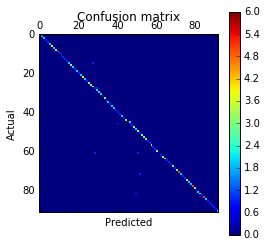

In [173]:
import pylab as plt
%matplotlib inline
plt.matshow(cnf_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [174]:
from sklearn.metrics import completeness_score, homogeneity_score

In [175]:
print completeness_score(y_test,predictions)

0.982934793641


In [176]:
print homogeneity_score(y_test,predictions)

0.98303404719


In [177]:
print clf.score(X_train,y_train)

1.0


In [178]:
print clf.score(X_test,predictions)

1.0


In [179]:
print clf.score(X_test,y_test)

0.954545454545


In [180]:
from sklearn import cross_validation

In [181]:
# Linear Discriminant Analysis
clf = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)

clf.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=True, tol=0.0001)

In [182]:
cv_scores = cross_validation.cross_val_score(clf, X,y, cv=10)

In [183]:
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy: 0.98 (+/- 0.03)


# Using decision trees through scikit-learn

In [293]:
from sklearn.cross_validation import train_test_split, KFold

In [294]:
#Because we don't have labels for the "test.csv" file, 
#we have to do a train/test split using the "train.csv" file provided

data = pd.read_csv("train.csv")
data.head(2)

X = data.iloc[:,2:]
y = data.iloc[:,1]

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [296]:
X_train.head(2)

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
577,0.015625,0.060547,0.025391,0.011719,0.001953,0.035156,0.019531,0.0,0.005859,0.019531,...,0.12305,0.0,0.000000,0.0,0.003906,0.0,0.008789,0.0,0.000977,0.003906
660,0.025391,0.027344,0.056641,0.033203,0.003906,0.025391,0.080078,0.0,0.000000,0.072266,...,0.14160,0.0,0.019531,0.0,0.000977,0.0,0.000000,0.0,0.000000,0.016602


In [297]:
y_train.head(4)

577      Quercus_x_Turneri
660         Salix_Intergra
383    Quercus_x_Hispanica
37       Cotinus_Coggygria
Name: species, dtype: object

In [298]:
from sklearn import tree
from sklearn.grid_search import GridSearchCV

In [299]:
dt = tree.DecisionTreeClassifier()

parameters = {
    'criterion': ['entropy','gini'],
    'max_depth': np.linspace(1, 10, 10),
    'min_samples_leaf': np.linspace(1, 20, 10),
    'min_samples_split': np.linspace(2, 10, 5)
}

gs = GridSearchCV(dt, parameters, verbose=1, cv=5)

In [300]:
%time _ = gs.fit(X_train, y_train)

gs.best_params_, gs.best_score_

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:   17.4s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   52.1s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:  2.0min
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:  3.7min
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:  6.1min
[Parallel(n_jobs=1)]: Done 2449 tasks       | elapsed:  9.0min
[Parallel(n_jobs=1)]: Done 3199 tasks       | elapsed:  9.5min
[Parallel(n_jobs=1)]: Done 4049 tasks       | elapsed: 10.3min
[Parallel(n_jobs=1)]: Done 4999 tasks       | elapsed: 11.7min
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed: 11.7min finished


CPU times: user 11min 43s, sys: 448 ms, total: 11min 43s
Wall time: 11min 43s


({'criterion': 'entropy',
  'max_depth': 9.0,
  'min_samples_leaf': 1.0,
  'min_samples_split': 2.0},
 0.64646464646464652)

Output from above was:
    
({'criterion': 'entropy',
  'max_depth': 9.0,
  'min_samples_leaf': 1.0,
  'min_samples_split': 2.0},
 0.64646464646464652)

In [301]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print "Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n"
    if show_classification_report:
        print "Classification report"
        print metrics.classification_report(y, y_pred),"\n"
      
    if show_confusion_matrix:
        print "Confusion matrix"
        print metrics.confusion_matrix(y, y_pred),"\n"

In [302]:
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=1, min_samples_split=2)

dt.fit(X_train, y_train)
measure_performance(X_test, y_test, dt, show_confusion_matrix=False, show_classification_report=True)

Accuracy:0.611 

Classification report
             precision    recall  f1-score   support

Acer_Capillipes       0.50      1.00      0.67         1
Acer_Circinatum       1.00      1.00      1.00         2
  Acer_Mono       0.33      0.50      0.40         2
Acer_Opalus       0.50      1.00      0.67         1
Acer_Palmatum       0.33      1.00      0.50         1
Acer_Pictum       1.00      1.00      1.00         2
Acer_Platanoids       0.50      0.25      0.33         4
Acer_Rubrum       1.00      1.00      1.00         2
Acer_Rufinerve       1.00      0.67      0.80         3
Acer_Saccharinum       1.00      0.60      0.75         5
Alnus_Cordata       1.00      1.00      1.00         1
Alnus_Maximowiczii       0.50      1.00      0.67         1
Alnus_Rubra       0.17      1.00      0.29         1
Alnus_Sieboldiana       1.00      1.00      1.00         1
Alnus_Viridis       1.00      1.00      1.00         1
Arundinaria_Simonii       1.00      0.67      0.80         3
Betula_Austr

//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Random forest

In [10]:
from sklearn.cross_validation import train_test_split, KFold

In [12]:
data = pd.read_csv("train.csv")
print data.head(2)
X = data.iloc[:,2:]
y = data.iloc[:,1]

   id                species   margin1   margin2   margin3   margin4  \
0   1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1   2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   

    margin5   margin6   margin7  margin8    ...      texture55  texture56  \
0  0.011719  0.009766  0.027344      0.0    ...       0.007812        0.0   
1  0.025391  0.001953  0.019531      0.0    ...       0.000977        0.0   

   texture57  texture58  texture59  texture60  texture61  texture62  \
0    0.00293   0.002930   0.035156        0.0        0.0   0.004883   
1    0.00000   0.000977   0.023438        0.0        0.0   0.000977   

   texture63  texture64  
0   0.000000   0.025391  
1   0.039062   0.022461  

[2 rows x 194 columns]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [15]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print "Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n"
    if show_classification_report:
        print "Classification report"
        print metrics.classification_report(y, y_pred),"\n"
      
    if show_confusion_matrix:
        print "Confusion matrix"
        print metrics.confusion_matrix(y, y_pred),"\n"

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)

In [18]:
measure_performance(X_test, y_test, rf, show_confusion_matrix=False, show_classification_report=False)

Accuracy:0.803 



## Here, our accuracy from random forests was 0.803, considerably higher than the 0.611 accuracy from the decision trees model

# Gradient Boosted Regression Trees

http://www.slideshare.net/DataRobot/gradient-boosted-regression-trees-in-scikitlearn

In [13]:
# Load in the data 
data = pd.read_csv("train.csv")
#print data.head(2)

In [14]:
# We have to make the target attribute numerical for this to work properly:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(data['species'])

le.classes_

data['species'] = le.transform(data['species']) 

data.head(4)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,3,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,49,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,65,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,94,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852


In [6]:
le.inverse_transform(data['species'])   # To obtain the original species names from the numerical values

array(['Acer_Opalus', 'Pterocarya_Stenoptera', 'Quercus_Hartwissiana',
       'Tilia_Tomentosa', 'Quercus_Variabilis', 'Magnolia_Salicifolia',
       'Quercus_Canariensis', 'Quercus_Rubra', 'Quercus_Brantii',
       'Salix_Fragilis', 'Zelkova_Serrata', 'Betula_Austrosinensis',
       'Quercus_Pontica', 'Quercus_Afares', 'Quercus_Coccifera',
       'Fagus_Sylvatica', 'Phildelphus', 'Acer_Palmatum',
       'Quercus_Pubescens', 'Populus_Adenopoda', 'Quercus_Trojana',
       'Quercus_Variabilis', 'Alnus_Sieboldiana', 'Quercus_Ilex',
       'Arundinaria_Simonii', 'Acer_Platanoids', 'Quercus_Phillyraeoides',
       'Cornus_Chinensis', 'Quercus_Phillyraeoides', 'Fagus_Sylvatica',
       'Liriodendron_Tulipifera', 'Cytisus_Battandieri', 'Tilia_Tomentosa',
       'Rhododendron_x_Russellianum', 'Alnus_Rubra',
       'Eucalyptus_Glaucescens', 'Cercis_Siliquastrum',
       'Cotinus_Coggygria', 'Celtis_Koraiensis', 'Quercus_Crassifolia',
       'Quercus_Variabilis', 'Quercus_Hartwissiana', 'Quercus

In [15]:
X = data.iloc[:,2:]
y = data.iloc[:,1]

In [16]:
from sklearn.cross_validation import train_test_split, KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
gbrt = GradientBoostingClassifier(n_estimators=100,learning_rate=0.15,max_depth=1,min_samples_leaf=2)

In [27]:
gbrt.fit(X_train, y_train)

print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

accuracy on training set: 0.775253
accuracy on test set: 0.338384


In [28]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
        print "Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n"
    if show_classification_report:
        print "Classification report"
        print metrics.classification_report(y, y_pred),"\n"
      
    if show_confusion_matrix:
        print "Confusion matrix"
        print metrics.confusion_matrix(y, y_pred),"\n"

In [30]:
measure_performance(X_test, y_test, gbrt, show_confusion_matrix=True, show_classification_report=False)

Accuracy:0.338 

Confusion matrix
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]
 [0 0 2 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]] 



# Using Support vector machines

In [55]:
from sklearn.cross_validation import train_test_split, KFold

In [56]:
data = pd.read_csv("train.csv")
#print data.head(2)
X = data.iloc[:,2:]
y = data.iloc[:,1]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [58]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print "Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n"
    if show_classification_report:
        print "Classification report"
        print metrics.classification_report(y, y_pred),"\n"
      
    if show_confusion_matrix:
        print "Confusion matrix"
        print metrics.confusion_matrix(y, y_pred),"\n"

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

## Using grid search to optimize the gamma, C, and kernel parameters of SVC

In [60]:
from sklearn.grid_search import GridSearchCV

#SVM = SVC(kernel='linear', C=1, gamma=1) 


SVM = SVC() 



# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

gs = GridSearchCV(SVM, tuned_parameters, verbose=1, cv=5)

In [61]:
%time _ = gs.fit(X_train, y_train)

gs.best_params_, gs.best_score_

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   10.6s


CPU times: user 12.7 s, sys: 22.9 ms, total: 12.7 s
Wall time: 12.7 s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   12.5s finished


({'C': 100, 'kernel': 'linear'}, 0.93434343434343436)

In [62]:
optimized_SVC = SVC(kernel='linear',C=100)

optimized_SVC.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
measure_performance(X_test, y_test, optimized_SVC, show_confusion_matrix=False, show_classification_report=False)

Accuracy:0.939 



In [64]:
predictions = optimized_SVC.predict(X_test)

In [65]:
metrics.accuracy_score(y_test,predictions)

0.93939393939393945

### With support vector machines, we are able to obtain an accuracy of 93.94%. This is better than random forest, but not as good as linear discriminant analysis

# Logistic regression

In [373]:
# Load in the data
data = pd.read_csv("train.csv")


### Preprocess the data to make a binary value for whether a sample is in the maple family or not

maple = ['Acer_Capillipes',
         'Acer_Circinatum', 
         'Acer_Mono', 
         'Acer_Opalus', 
         'Acer_Palmatum',
         'Acer_Pictum', 
         'Acer_Platanoids',
         'Acer_Rubrum',
         'Acer_Rufinerve',
         'Acer_Saccharinum']

maple_binary = []

for i in range(len(data)):        #For each row of the data
    if data.iloc[i,1] in maple:   #If the species is in the maple family
        maple_binary.append(1)    #Append the binary list with a 1 for 'maple'
    else:
        maple_binary.append(0)    #Append the binary list with 0 for 'not maple'

In [375]:
maple_binaryDF = pd.DataFrame(maple_binary)

In [381]:
binaryDF = pd.concat([data, maple_binaryDF], axis=1)

In [384]:
binaryDF.columns

Index([       u'id',   u'species',   u'margin1',   u'margin2',   u'margin3',
         u'margin4',   u'margin5',   u'margin6',   u'margin7',   u'margin8',
       ...
       u'texture56', u'texture57', u'texture58', u'texture59', u'texture60',
       u'texture61', u'texture62', u'texture63', u'texture64',            0],
      dtype='object', length=195)

In [387]:
binaryDF = binaryDF.rename(columns={ 0 : 'maple'})

In [395]:
SGD_logisticDF = binaryDF.iloc[:,2:195]

In [397]:
SGD_logisticDF.head(3)

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64,maple
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.0,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391,1
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.0,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461,0
2,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.0,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930,0


In [407]:
X = SGD_logisticDF.iloc[:,:192]
y = SGD_logisticDF.iloc[:,192]

In [416]:
from sklearn.cross_validation import train_test_split, KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print len(X_test)

198


In [409]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [410]:
from sklearn.linear_model import SGDClassifier

In [411]:
clf = SGDClassifier(loss="log", penalty="l2")   #"log" loss here is for logisitc regression
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [412]:
predictions = clf.predict(X_test)

In [415]:
print len(predictions)
predictions

198


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [419]:
clf.coef_

array([[-30.76135, -29.51078,  -1.18862,  -0.32186,   9.79891, -45.60056,
         11.11175,  -7.66087,  60.22561,  -4.26151, -16.46279,  -1.00166,
        -24.73643,  14.93724,  23.38259, -30.0679 ,  -0.07179,   8.43622,
         16.31602,   2.35551, -15.78583, -13.16674,   3.00028,  34.57936,
          4.98946,  24.76629,  10.87953,   2.82099,  36.11771, -19.24321,
         25.16041,  36.83558,  26.25927,   8.51686, -26.8601 , -15.49195,
        -19.36943,  -2.94937,  17.62645,  -9.92373,  22.56127,   6.16294,
         -8.33438,  -2.65717,  14.24523,  15.98599,   2.01038,  -0.09782,
         14.99629, -15.56265, -27.38744,  32.04595, -15.85495,  25.10375,
          1.67364,   0.35034,  -6.83723,  36.41177,  17.29232,  11.32819,
         37.84671, -27.06719,  17.65002,  -3.55392,   1.53704,   5.35837,
         12.60524,   8.88949,   3.80764,  -4.28164,   2.36689,  19.58683,
         27.94282,  19.559  ,  11.90183,  -0.70916, -10.12015, -20.57253,
        -28.28183, -29.06331, -22.2033

In [420]:
clf.intercept_

array([-630.97932])

In [421]:
clf.decision_function(X_test)

array([-610.27347, -612.57901, -626.118  , -619.56127, -625.55312,
       -637.60107, -642.1907 , -634.42971, -627.50804, -619.68191,
       -617.35223, -623.8103 , -616.04574, -636.25065, -637.50082,
       -633.04812, -640.68896, -626.45105, -618.65489, -625.25689,
       -629.92531, -634.41172, -615.08909, -623.09216, -643.27301,
       -632.45961, -627.6684 , -651.19382, -613.41649, -606.16055,
       -631.34133, -633.33816, -636.6595 , -627.97386, -614.26702,
       -629.93235, -647.54873, -607.8192 , -626.66727, -618.75687,
       -622.7678 , -612.39395, -631.23153, -650.23034, -624.33444,
       -636.92741, -625.09424, -633.43987, -629.55691, -612.54644,
       -627.69531, -619.01962, -626.12075, -626.73796, -625.20119,
       -629.03996, -635.16086, -632.65539, -634.60553, -620.31176,
       -625.40065, -630.30861, -616.92122, -627.08344, -619.96178,
       -634.07268, -615.23944, -621.03996, -625.12534, -651.57115,
       -656.85703, -645.33646, -649.14445, -650.90415, -626.73

In [417]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print "Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n"
    if show_classification_report:
        print "Classification report"
        print metrics.classification_report(y, y_pred),"\n"
      
    if show_confusion_matrix:
        print "Confusion matrix"
        print metrics.confusion_matrix(y, y_pred),"\n"

In [418]:
measure_performance(X_test, y_test, clf, show_confusion_matrix=False, show_classification_report=True)

Accuracy:0.884 

Classification report
             precision    recall  f1-score   support

          0       0.88      1.00      0.94       175
          1       0.00      0.00      0.00        23

avg / total       0.78      0.88      0.83       198




## Using grid search with logistic regression and stochastic gradient descent with the train and test data from above

In [423]:
from sklearn.linear_model import SGDClassifier

logistic_SGD = SGDClassifier() 

# Set the parameters by cross-validation
tuned_parameters = [{'alpha': np.linspace(0.0001,0.001,10),
                     'l1_ratio': np.linspace(0.01,0.2,10),
                     'loss': ['hinge','log'],
                     'penalty': ['l1','l2']}]

In [424]:
from sklearn.grid_search import GridSearchCV

gs = GridSearchCV(logistic_SGD, tuned_parameters, verbose=1, cv=5)

In [428]:
logistic_SGD.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [429]:
predictions = logistic_SGD.predict(X_test)

In [430]:
predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [431]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print "Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n"
    if show_classification_report:
        print "Classification report"
        print metrics.classification_report(y, y_pred),"\n"
      
    if show_confusion_matrix:
        print "Confusion matrix"
        print metrics.confusion_matrix(y, y_pred),"\n"

In [432]:
measure_performance(X_test, y_test, logistic_SGD, show_confusion_matrix=False, show_classification_report=True)

Accuracy:0.924 

Classification report
             precision    recall  f1-score   support

          0       0.92      1.00      0.96       175
          1       1.00      0.35      0.52        23

avg / total       0.93      0.92      0.91       198




# Data analysis report

## Attempted analyses:
1) KMeans Clustering without normalization

2) KMeans clustering with normalized and PCA dimensionality-reduced data

3) LDA classification model built by hand

4) LDA classification model via scikit-learn

5) Decision Trees Classification with grid search

6) Random Forest Classification

7) Gradient boosted regression trees

8) Support Vector Machines Classification with grid search

9) Classification via scikit-learn with logistic regression with stochastic gradient descent

10) Classification via scikit-learn with stochastic gradient descent and grid search



## Methodologies:

Decision trees with grid search:

parameters = {
    'criterion': ['entropy','gini'],
    'max_depth': np.linspace(1, 10, 10),
    'min_samples_leaf': np.linspace(1, 20, 10),
    'min_samples_split': np.linspace(2, 10, 5)
}
    


Support vector machines with grid search:

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]




Logistic regression via scikit-learn with stochastic gradient descent

parameters = [{'loss' : 'log',
                'penanlty' : 'l2'}]
                
                
                
                
                
Classification via scikit-learn with with stochastic gradient descent

tuned_parameters = [{'alpha': np.linspace(0.0001,0.001,10),
                     'l1_ratio': np.linspace(0.01,0.2,10),
                     'loss': ['hinge','log'],
                     'penalty': ['l1','l2']}]



## Results:
1) KMeans Clustering without normalization

Completeness score = 0.7616, Homogeneity score = 0.2854

2) KMeans clustering with normalized and PCA dimensionality-reduced data

Completeness score = 0.7576, Homogeneity score = 0.2827, #Dimensions = 32, 

reduced from initial 192, Cumulative % of variance = 0.9045 on 32 dimensions

3) LDA classification model built by hand


4) LDA classification model via scikit-learn

Completeness score = 0.9829, Homogeneity score = 0.9830

Overall accuracy = 0.98 +- 0.03

5) Decision Trees Classification with grid search

Classification accuracy = 0.611

6) Random Forest Classification

Classification accuracy = 0.803

7) Gradient boosted regression trees

Training classification accuracy = 0.775253
Test classification accuracy = 0.338384

8) Support Vector Machines Classification with grid search

Classification accuracy = 0.9393

9) Logistic regression classification via scikit-learn with stochastic gradient descent

Classification accuracy = 0.884

10) Classification via scikit-learn with stochastic gradient descent AND grid search

Classification accuracy = 0.924



# Analysis summary/ takeaways

After trying KMeans clustering on the leaf classification dataset, we learned that we can accomplish very similar completeness and homogeneity scores whether we preprocess the data via PCA and normalization or not. Because the completeness score was fairly high (~0.762), we deduce that most of the points in a given species were assigned to the same cluster. However, because the homogeneity score was fairly low (~0.285), we deduce that the clusters contained more than one species of tree in each cluster.




There were 8 classification algorithms applied to the dataset to see which one had the highest classification accuracy as measured using the test data with the model trained on the training data. The best model was the linear discriminant analysis, with a classification score of  ~98%. This means that the data were linearly separable, and the model was robust enough to have high predictive validity when applied to unseen data instances. The next most accurate classifiers were support vector machines (~93.93%) and stochastic gradient descent with grid search (~92.4%). In this case, the grid search selected "hinge" as the loss method parameter over 'log' for logistic regression. 

The result that we obtained with linear discriminant analysis was very impressive, and it suggests that tree leaves can be very successfully classified into their respective species by using machine learning algorithms. This could potentially be very beneficial for botany, ecology, and environmental conservationist workers, who may need to classify a species of tree leaves to determine if the species is invasive and needs to be cut down from the forest to allow for healthier growth of native flora.

Some of the grid search methods offered significant improvements over the base models, but testing a large set of parameter values can take a very long time. If I had more time to exhaustively search for an optimal set of parameters, I think I could have obtained a very promising result with support vector machines or stochastic gradient descent. 

Something that I would like to have tried but did not have time to perform was XGBoost. I was unable to load it into python and didn't have time to figure out why it was not able to import properly, but I would like to have been able to perform grid search using XGBoost on the data for classification purposes to see how good of a result I could obtain. This package in python allows for parallel computation, so the model would take less time to run. In some of my classifers, I waited about 2 hours for them to run grid search and I still did not obtain a result, so I had to reduce the number of parameter values specified in the grid search so that the model would finish in less than approx. 15 minutes.

Of course, the result of 98% via linear discriminant analysis is very good, and there is not much room left for improvement after that.

Something interesting that I noted during the analysis was that the gradient boosted regression trees model was very overfit. I would like to experiment with pre-pruning of that model to see if I could minimize the accuracy loss on the test data instances. One of the most rewarding things that I learned in this project was that fine-tuning the parameters can make a very big difference in your results, and there is an art form to model and feature selection. If I had more time to work on the project, I would like to have performed some feature extraction and also to have interpreted the practical significance of the attributes. The kaggle dataset did not offer much information on why the different measurements were divided into 64 different attributes, and I don't know much about computer vision or working with binary image data, so I would have enjoyed learning more about how these tree leaves were processed into the dataset to run these classifers.


The most challenging aspect of this project for me was performing the manual model construction for linear discriminant analysis. I ran into a Type Error each time I tried to run the script to compute the within-class scatter matrix. When I tested the code out on different permutations of values and using integers instead of matrices, I was able to run the code without any errors, but it seemed that python had some issue with me trying to add the dot product of the mean vector and data vector to the scatter matrix. I enjoyed learning more about what these models do "under the hood", so to speak. I have come to appreciate the convenience of using scikit learn to run these applications, and I amazed at how quickly some of these models can be run on large datasets.